In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


In [2]:
data_dir = "D:/ml_practice/Digit_recon/"
# load csv to numpy arrays

def load_data(data_dir, train_row):
    train = pd.read_csv(data_dir + "train.csv")
    print(train.shape)
#     print(train.head())
#     print(train.shape)
#     print(train.head())
#     print(train[0:])
    X_train = train.values[0:train_row,1:] # 取下标为1-784的列（pixel0 - pixel783）
    y_train = train.values[0:train_row,0] # 取下标为0的列 (label)
    
    
    Pred_test = pd.read_csv(data_dir + "test.csv").values  # 解释 value
#     print(Pred_test.shape)
#     print(pd.read_csv(data_dir + "test.csv").head())
    return X_train, y_train, Pred_test

train_row = 5000 # 如果想取全部数据，设置为最大值 42000
Origin_x_train, Origin_y_train, Origin_y_test = load_data(data_dir, train_row)

(42000, 785)


3


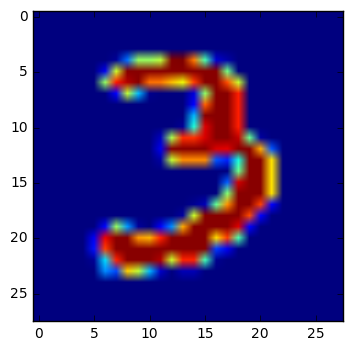

In [4]:
sample_row = 9
print(Origin_y_train[sample_row])
plt.imshow(Origin_x_train[sample_row].reshape(28,28))
plt.show()

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


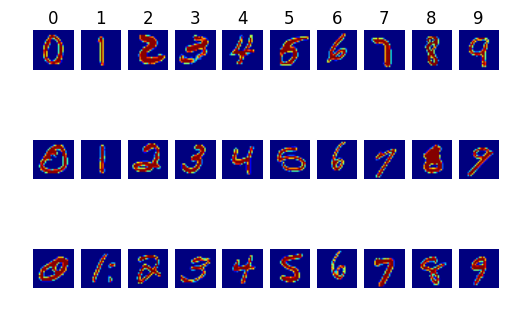

In [26]:
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
rows = 3
print(classes)
for y, cls in enumerate(classes):
    idxs = np.nonzero([i == y for i in Origin_y_train])
    idxs = np.random.choice(idxs[0],rows)
    for i , idx in enumerate(idxs):
        plt_idx = i * len(classes) + y + 1
        plt.subplot(rows, 10, plt_idx)
        plt.imshow(Origin_X_train[idx].reshape((28, 28)))
        plt.axis("off")
        if i == 0:
            plt.title(cls)
        

plt.show()

In [6]:
x_train, x_test, y_train, y_test = train_test_split(Origin_x_train,Origin_y_train,test_size = 0.2,random_state = 0)
print(x_train.shape, x_test.shape,y_train.shape,y_test.shape)

(4000, 784) (1000, 784) (4000,) (1000,)


In [8]:
ans_k = 0
k_range = range(1, 10)
scores= []
for k in k_range:
    print("k=" + str(k) + "begins")
    start_time = time.time()
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    scores.append(accuracy)
    end_time = time.time()
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print("time"+ str(end_time-start_time)+ "seconds")

k=1begins
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       103
          1       0.90      0.98      0.94       100
          2       0.97      0.88      0.92       104
          3       0.89      0.93      0.91       100
          4       0.93      0.93      0.93       107
          5       0.95      0.88      0.92        94
          6       0.93      0.97      0.95        93
          7       0.92      0.94      0.93       116
          8       0.89      0.85      0.87        85
          9       0.85      0.85      0.85        98

avg / total       0.92      0.92      0.92      1000

[[101   0   0   1   0   0   1   0   0   0]
 [  0  98   0   1   0   0   0   0   0   1]
 [  0   1  91   2   2   0   1   2   3   2]
 [  0   0   1  93   0   1   0   1   3   1]
 [  0   0   0   0  99   0   1   0   0   7]
 [  0   2   1   3   0  83   3   0   2   0]
 [  1   1   0   0   0   0  90   0   1   0]
 [  0   4   0   0   1   0   0 109   0   2]
 [  0  

             precision    recall  f1-score   support

          0       0.95      0.98      0.97       103
          1       0.82      0.98      0.89       100
          2       0.98      0.88      0.92       104
          3       0.93      0.91      0.92       100
          4       0.93      0.93      0.93       107
          5       0.91      0.89      0.90        94
          6       0.88      0.98      0.93        93
          7       0.89      0.87      0.88       116
          8       0.96      0.79      0.86        85
          9       0.83      0.83      0.83        98

avg / total       0.91      0.90      0.90      1000

[[101   0   0   0   0   0   2   0   0   0]
 [  0  98   0   0   0   0   1   0   0   1]
 [  0   4  91   1   0   0   0   4   2   2]
 [  0   0   1  91   0   2   1   2   1   2]
 [  0   0   0   0  99   0   1   0   0   7]
 [  0   3   0   1   0  84   6   0   0   0]
 [  1   0   0   0   0   1  91   0   0   0]
 [  0  10   0   0   2   0   0 101   0   3]
 [  2   3   0   4

[0.91900000000000004, 0.90600000000000003, 0.92000000000000004, 0.91500000000000004, 0.91500000000000004, 0.91400000000000003, 0.91500000000000004, 0.90900000000000003, 0.90400000000000003]


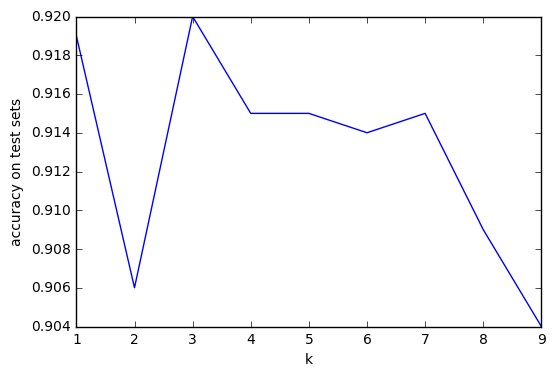

In [11]:
print(scores)
plt.plot(k_range,scores)
plt.xlabel("k")
plt.ylabel("accuracy on test sets")
plt.show()

In [12]:
# we found that k =3 is the best choice for now.
best_k = 3

In [16]:
# then we use this k to do some real predicts on the whole test sets
knn = KNeighborsClassifier(n_neighbors = best_k)
knn.fit(Origin_x_train,Origin_y_train)
y_pred = knn.predict(Origin_y_test)

In [17]:
print(len(y_pred))

28000


6


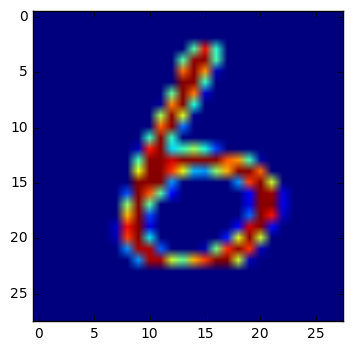

In [18]:
print (y_pred[2001])
plt.imshow(Origin_y_test[2001].reshape((28, 28)))
plt.show()

In [19]:
pd.DataFrame({"ImageId": list(range(1,len(y_pred)+1)),"Label": y_pred}).to_csv('Digit_Recogniser_Result.csv',index=False,header=True)